In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Convert number using commas as thousands separators
pd.options.display.float_format = '{:,}'.format

## Products data

In [2]:
# Load data
products = pd.read_csv('Products.csv')
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [3]:
products.shape

(4370, 10)

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4370 non-null   int64  
 1   name         4369 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4370 non-null   float64
 4   price        4370 non-null   int64  
 5   list_price   4370 non-null   int64  
 6   brand        4370 non-null   object 
 7   group        4370 non-null   object 
 8   url          4370 non-null   object 
 9   image        4370 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.5+ KB


In [5]:
products.describe()

,item_id,rating,price,list_price
count,"4,370.0","4,370.0","4,370.0","4,370.0"
mean,"35,066,617.69153318",3.6734324942791767,"2,764,025.271853547","3,894,278.070938215"
std,"25,643,928.346114974",1.7958030413138288,"5,545,780.839713888","7,903,281.133806564"
min,"54,665.0",0.0,"7,000.0","12,000.0"
25%,"10,857,954.5",3.8,"150,000.0","279,000.0"
50%,"32,885,244.5",4.5,"486,500.5","790,000.0"
75%,"56,395,549.75",4.8,"2,679,000.0","3,590,000.0"
max,"85,042,408.0",5.0,"62,690,000.0","82,990,000.0"


**Nhận xét:**
* Có sự chênh lệch lớn giữa price của mặt hàng thấp nhất và cao nhất, mặt hàng thấp nhất có giá 7,000 trong khi mặt hàng cao nhất có giá đến 62,690,000. Điều tương tự cũng xảy ra với list_price, thấp nhất 12,000 và cao nhất 82,990,000.
* Rating nằm trong khoảng từ 0 đến 5 và có trung bình đánh giá là 4.5

In [6]:
# # Use pandas profiling to explore dataset
# import pandas_profiling
# # Profile report
# profile = pandas_profiling.ProfileReport(products)
# profile.to_file(output_file='Products.html')

In [7]:
# Phân tích các biến số
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()

In [8]:
# Number of upper, lower outliers
def check_outlier(df, feature):
    plt.boxplot(feature)
    plt.show()
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    n_O_upper = df[feature > (Q3 + 1.5*scipy.stats.iqr(feature))].shape[0]
    print("Number of upper outliers:", n_O_upper)
    n_O_lower = df[feature < (Q1 - 1.5*scipy.stats.iqr(feature))].shape[0]
    print("Number of lower outliers:", n_O_lower)
    # Percentage of outliers
    outliers_per = (n_O_upper+n_O_lower)/df.shape[0]
    print("Percentage of outliers:", outliers_per)
    return Q1, Q3, n_O_upper, n_O_lower, outliers_per

#### Price Analysis

=====
central tendency of price: {'mean': 2764025.271853547, 'median': 486500.5, 'mode': 99000, 'min': 7000, 'max': 62690000, 'range': 62683000}
=====
Dispersion of price: 
 {'range': 62683000, 'q1': 150000.0, 'q3': 2679000.0, 'iqr': 2529000.0, 'var': 30755685122137.684, 'skew': 3.6530824214519195, 'kurtosis': 17.642384538762908}
=====


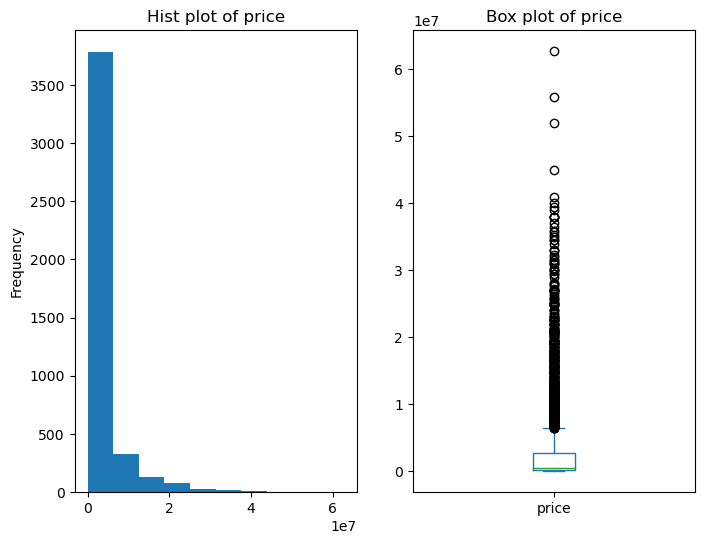

In [9]:
# Price
_analyzer.analyze_numeric_variable(variable_name='price', df=products)

=====
central tendency of list_price: {'mean': 3894278.070938215, 'median': 790000.0, 'mode': 150000, 'min': 12000, 'max': 82990000, 'range': 82978000}
=====
Dispersion of list_price: 
 {'range': 82978000, 'q1': 279000.0, 'q3': 3590000.0, 'iqr': 3311000.0, 'var': 62461852679982.766, 'skew': 4.030555575498478, 'kurtosis': 21.72450685552961}
=====


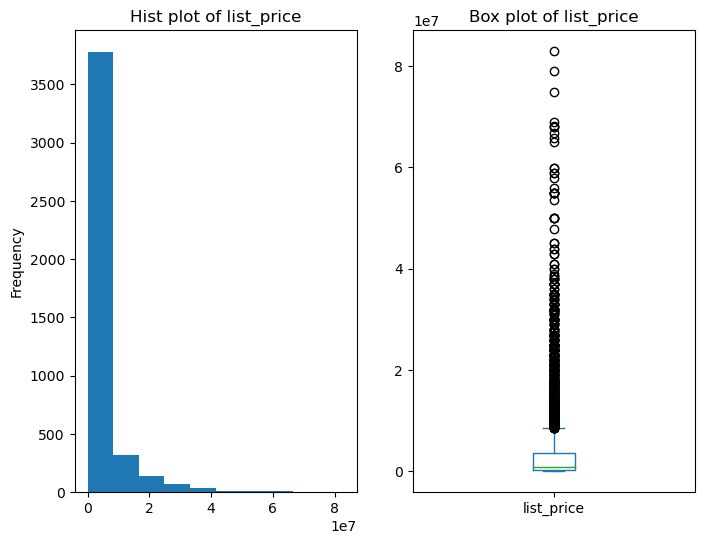

In [10]:
# List_price
_analyzer.analyze_numeric_variable(variable_name='list_price', df=products)

**Nhận xét:**
* Phân bố của price và list_price tương tự nhau, đều lệch phải
* Số lượng outliers cận trên rất nhiều
* Xem xét thu gọn lại phân bố của dữ liệu

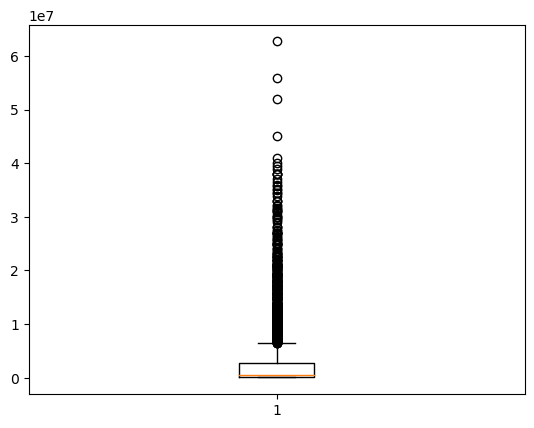

Number of upper outliers: 564
Number of lower outliers: 0
Percentage of outliers: 0.12906178489702516


In [11]:
# outliers của price
Q1_P, Q3_P, n_O_upper_P, n_O_lower_P, outliers_per_P = check_outlier(products, products.price)

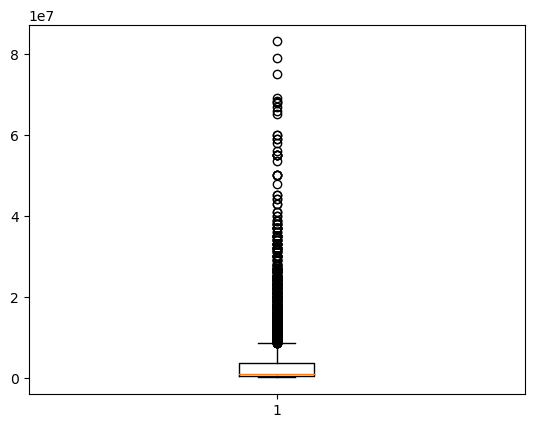

Number of upper outliers: 582
Number of lower outliers: 0
Percentage of outliers: 0.13318077803203662


In [12]:
# outliers của list_price
Q1_LP, Q3_LP, n_O_upper_LP, n_O_lower_LP, outliers_per_LP = check_outlier(products, products.list_price)

In [13]:
products.price.describe()

count               4,370.0
mean    2,764,025.271853547
std     5,545,780.839713888
min                 7,000.0
25%               150,000.0
50%               486,500.5
75%             2,679,000.0
max            62,690,000.0
Name: price, dtype: float64

In [14]:
# Proportion of product with pricing is higher than 25 million
num_over1mil = len(products[products['price'] > 25000000])
per_num_over1mil = (num_over1mil/(products['price'].count()))*100
print('Proportion of product with pricing is higher than 25 million: ', per_num_over1mil, "%")

Proportion of product with pricing is higher than 25 million:  1.3272311212814645 %


* Vì dữ liệu của products thuộc các nhóm Mobile_Tablet, TV_Audio, Laptop, Camera, Accessory, đây là nhóm hàng điện tử có khoảng giá rất rộng tùy theo chất lượng và thương hiệu, vì vậy, quyết định giữ lại tất cả outliers

In [15]:
# # Remove price is higher than 25 million
# products = products.loc[products['price'] < 25000000]
# products.shape

In [16]:
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


#### Giá theo brand

In [17]:
# Price
price_p = products.groupby('brand')['price'].sum().sort_values(ascending=False).head(10)
price_p = price_p.reset_index()
price_p

,brand,price
0,Samsung,1573592956
1,Apple,1130097000
2,LG,1104769900
3,Sony,944757700
4,Asus,429189000
5,Sharp,399193000
6,Electrolux,382923000
7,OEM,345576332
8,Fujifilm,328267000
9,Canon,324580000


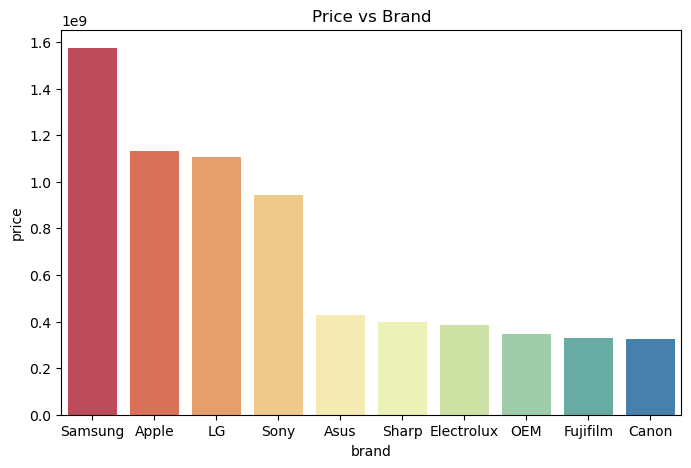

In [18]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x=price_p.brand, y=price_p.price, data=price_p, palette='Spectral')
plt.title('Price vs Brand')
plt.show()

In [19]:
# list_price
list_price_p = products.groupby('brand')['list_price'].sum().sort_values(ascending=False).head(10)
list_price_p = list_price_p.reset_index()
list_price_p

,brand,list_price
0,Samsung,2479306600
1,LG,1754323000
2,Apple,1397350000
3,Sony,1323741000
4,Sharp,655727000
5,OEM,587496082
6,Electrolux,542850000
7,Asus,463440000
8,Toshiba,460499000
9,Canon,403217950


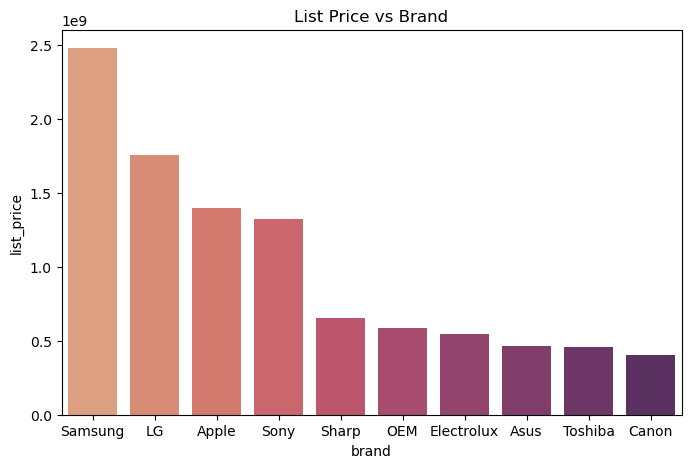

In [20]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x=list_price_p.brand, y=list_price_p.list_price, data=list_price_p, palette='flare')
plt.title('List Price vs Brand')
plt.show()

**Nhận xét:**
* Top 5 thương hiệu có giá cao nhất giữa price và list_price có sự thay đổi
* Đối với giá đã giảm, 5 thương hiệu có giá cao nhất là Canon, Microsoft, Sony, Fujifilm và LG
* Đối với giá chưa giảm, 5 thương hiệu có giá cao nhất là LG, Samsung, Sony, Canon và Hitachi

#### Giá theo nhóm hàng

In [21]:
# Price
price_g = products.groupby('group')['price'].sum().sort_values(ascending=False).head(10)
price_g = price_g.reset_index()
price_g

,group,price
0,Điện Tử - Điện Lạnh/Tủ lạnh,1214847000
1,Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone,1095361000
2,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,853818000
3,Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android ...,797150000
4,Điện Tử - Điện Lạnh/Tivi/Tivi 4K,762193000
5,Điện Tử - Điện Lạnh/Máy giặt,692043999
6,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,676578000
7,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh Mirror...,526140000
8,Điện Thoại - Máy Tính Bảng/Máy tính bảng,415742000
9,Điện Tử - Điện Lạnh/Máy sấy quần áo,281039000


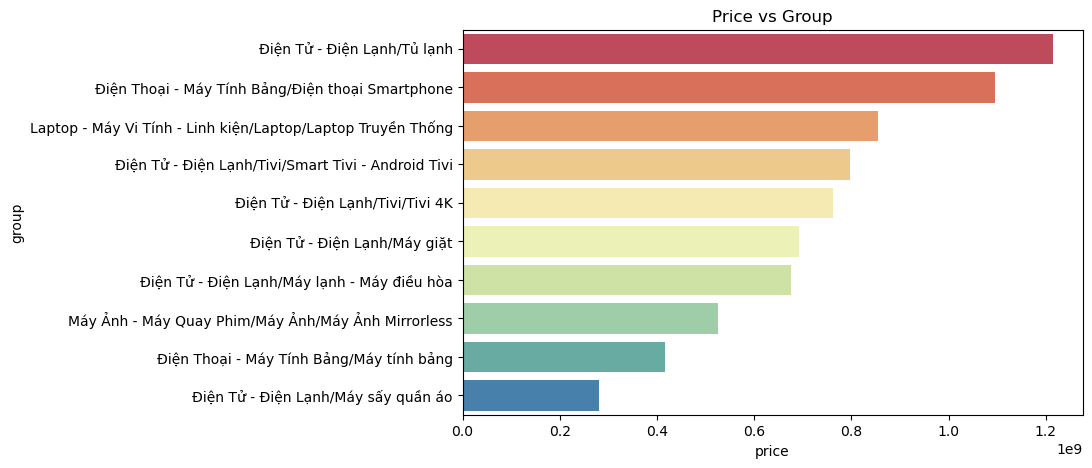

In [22]:
fig = plt.figure(figsize=(8,5))
sns.barplot(y=price_g.group, x=price_g.price, data=price_g, palette='Spectral')
plt.title('Price vs Group')
plt.show()

In [23]:
# list_price
list_price_g = products.groupby('group')['list_price'].sum().sort_values(ascending=False).head(10)
list_price_g = list_price_g.reset_index()
list_price_g

,group,list_price
0,Điện Tử - Điện Lạnh/Tủ lạnh,1837526000
1,Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone,1375050000
2,Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android ...,1253629600
3,Điện Tử - Điện Lạnh/Tivi/Tivi 4K,1234776000
4,Điện Tử - Điện Lạnh/Máy giặt,1056059000
5,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,925547000
6,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,904199000
7,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh Mirror...,666087000
8,Điện Thoại - Máy Tính Bảng/Máy tính bảng,474259000
9,Điện Tử - Điện Lạnh/Máy sấy quần áo,388010000


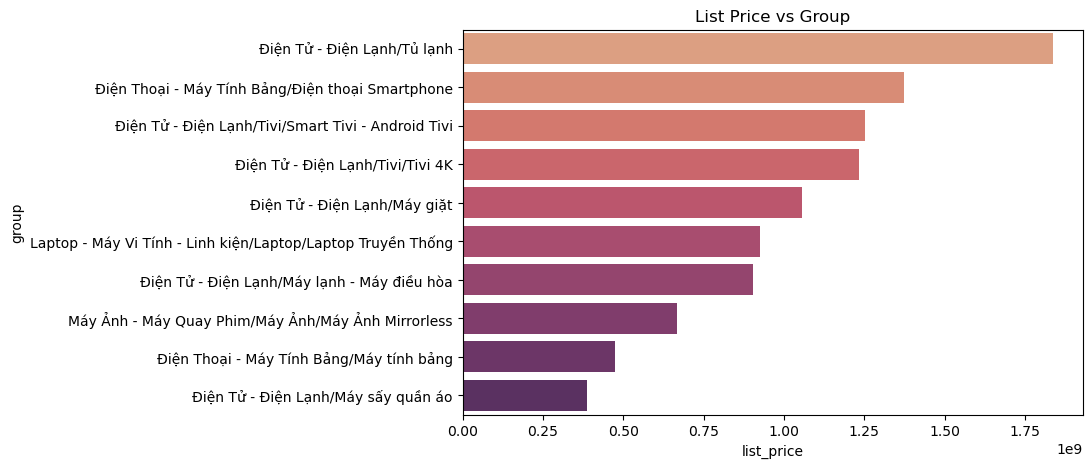

In [24]:
fig = plt.figure(figsize=(8,5))
sns.barplot(y=list_price_g.group, x=list_price_g.list_price, data=list_price_g, palette='flare')
plt.title('List Price vs Group')
plt.show()

**Nhận xét:**
* Không có thay đổi quá đáng kể trong trong top 5 nhóm hàng có giá cao nhất
* Các nhóm hàng thường có giá cao nhất là Điện Tử - Điện Lạnh/Tủ lạnh, Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone, Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android TV, Điện Tử - Điện Lạnh/Máy giặt và Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop Truyền Thống

#### Tỷ lệ giảm giá

In [25]:
products['sale'] = round((1 - products['price']/products['list_price']),2)
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image,sale
0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,0.74
1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,0.82
2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,0.25
3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,0.57
4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,0.4


In [26]:
# theo Brand
sale_brand = products.groupby('brand')['sale'].mean().sort_values(ascending=False).head(10)
sale_brand = sale_brand.reset_index()
sale_brand

,brand,sale
0,VinBuy,0.84
1,WK,0.81
2,Memo,0.78
3,Lahutech,0.76
4,I-Telecom,0.75
5,SENDEM,0.73
6,COOL COLD,0.72
7,Thái Dương,0.71
8,Dada,0.7
9,AnTech,0.7


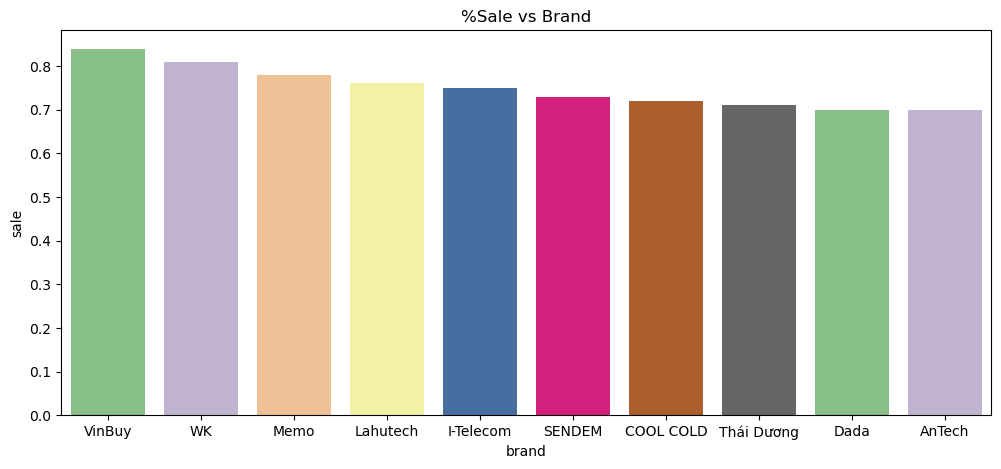

In [27]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x=sale_brand.brand, y=sale_brand.sale, data=sale_brand, palette='Accent')
plt.title('%Sale vs Brand')
plt.show()

In [28]:
# theo Group
sale_group = products.groupby('group')['sale'].mean().round(2).sort_values(ascending=False).head(10)
sale_group = sale_group.reset_index()
sale_group

,group,sale
0,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,0.83
1,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,0.81
2,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,0.78
3,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,0.72
4,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,0.68
5,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,0.68
6,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,0.68
7,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,0.66
8,Laptop - Máy Vi Tính - Linh kiện/Thiết Bị Văn ...,0.65
9,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Đeo Thông M...,0.64


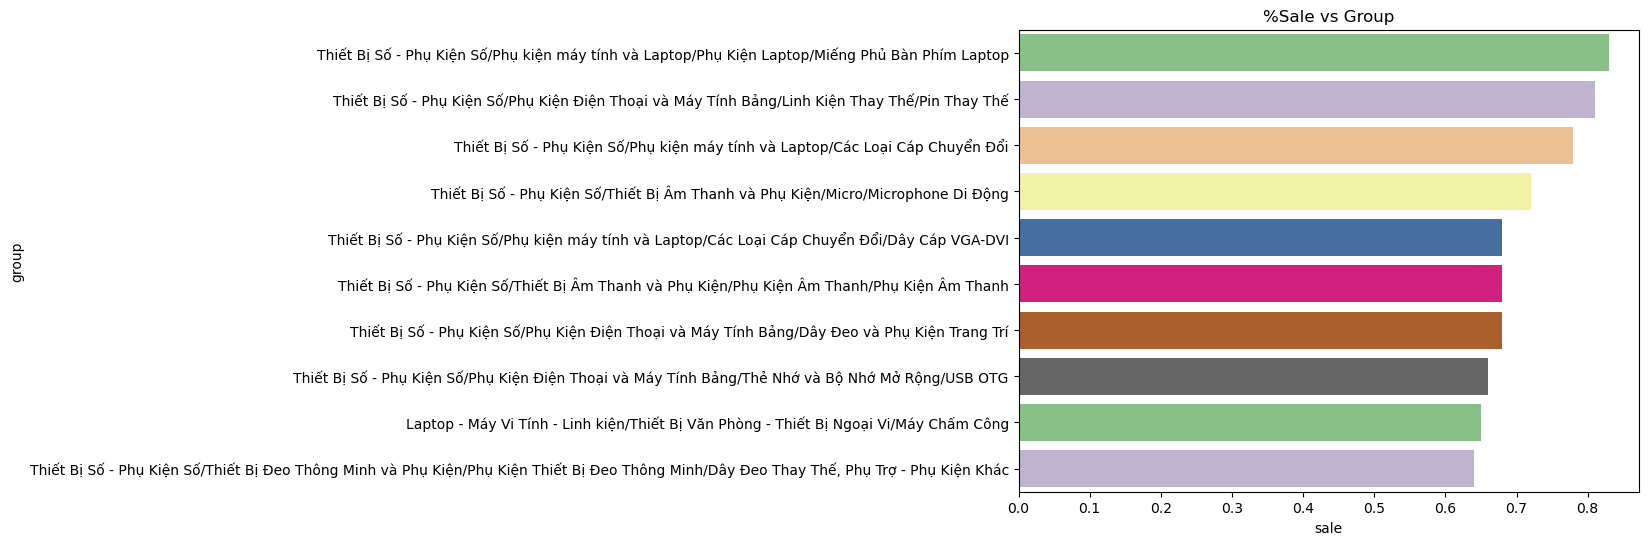

In [29]:
fig = plt.figure(figsize=(8,6))
sns.barplot(y=sale_group.group, x=sale_group.sale, data=sale_group, palette='Accent')
plt.title('%Sale vs Group')
plt.show()

**Nhận xét:**
* Các brand có tỷ lệ giảm giá trung bình cao nhất là VinBuy, WK, Memo, Lahutech và I-Telecom
* Các nhóm hàng có tỷ lệ giảm giá trung bình cao nhất là nhóm các thiết bị số, Phụ Kiện Số/Phụ kiện

#### Số lượng sản phẩm

In [30]:
# theo brand
num_p_brand = products['brand'].value_counts().head(10)
num_p_brand = num_p_brand.reset_index()
num_p_brand

,index,brand
0,OEM,1116
1,Samsung,199
2,Panasonic,96
3,Sony,95
4,LG,95
5,Yoosee,74
6,SanDisk,69
7,Apple,66
8,UGREEN,64
9,TP-Link,64


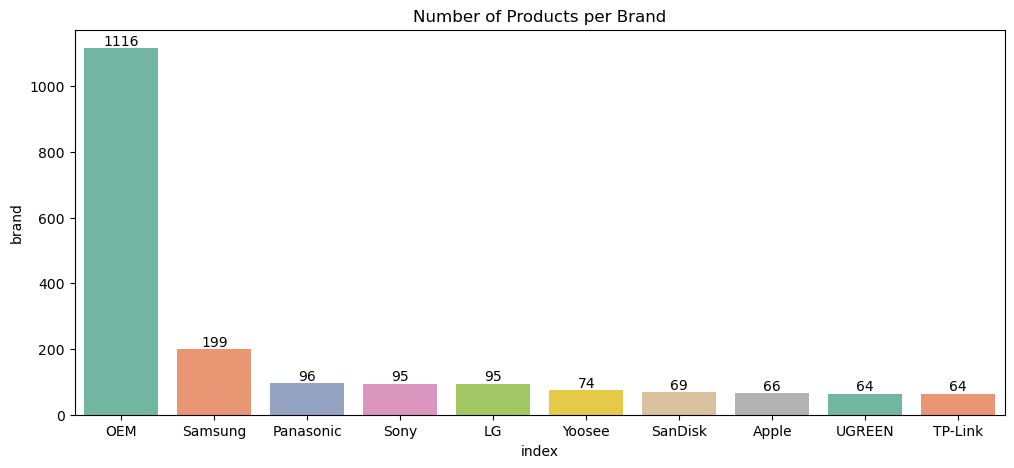

In [32]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=num_p_brand, x='index', y='brand', palette='Set2')
ax.bar_label(ax.containers[0], fmt='%.f')
plt.title('Number of Products per Brand')
plt.show()

In [33]:
# theo group
num_p_group = products['group'].value_counts().head(10)
num_p_group = num_p_group.reset_index()
num_p_group

,index,group
0,Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP,235
1,Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone,122
2,Điện Tử - Điện Lạnh/Tủ lạnh,121
3,Điện Thoại - Máy Tính Bảng/Điện thoại phổ thông,111
4,"Máy Ảnh - Máy Quay Phim/Phụ Kiện Máy Ảnh, Máy ...",94
5,Điện Tử - Điện Lạnh/Máy giặt,93
6,Điện Thoại - Máy Tính Bảng/Điện thoại bàn,90
7,"Máy Ảnh - Máy Quay Phim/Phụ Kiện Máy Ảnh, Máy ...",83
8,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,82
9,Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android ...,70


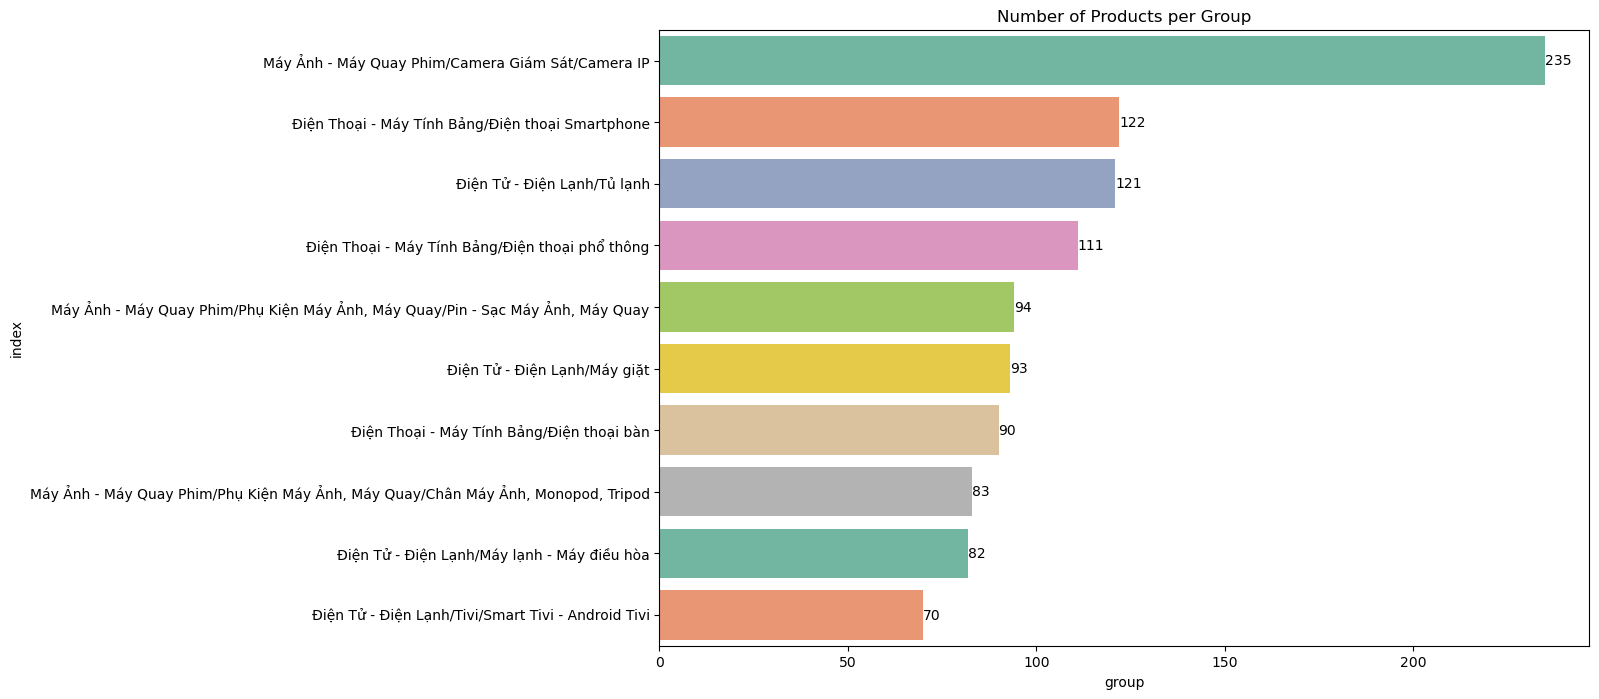

In [34]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=num_p_group, y='index', x='group', palette='Set2')
ax.bar_label(ax.containers[0], fmt='%.f')
plt.title('Number of Products per Group')
plt.show()

**Nhận xét:**
* Có sự chênh lệch lớn trong số lượng sản phẩm theo Brand: OEM có nhiều sản phẩm nhất với 1116, Samsung đứng vị trí thứ 2 nhưng chỉ có 199 sản phẩm
* Sự chênh lệch trong số lượng sản phẩm theo group không nhiều, Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP là nhóm có nhiều sản phẩm nhất với 235 sản phẩm, theo sau là Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone	 với 122 sản phẩm

#### Rating

In [35]:
rating_product = products.groupby('rating')['item_id'].count().sort_values(ascending=False)
rating_product

rating
0.0    788
5.0    593
4.8    442
4.7    427
4.6    361
4.5    326
4.3    233
4.9    220
4.0    204
4.4    191
4.2    125
4.1     77
3.8     61
3.7     53
3.0     52
3.9     49
3.5     40
1.0     24
3.6     23
3.3     17
3.4     15
3.2      9
2.5      7
2.0      7
2.7      6
3.1      5
2.8      4
2.3      4
2.2      2
1.3      2
1.8      1
2.6      1
2.1      1
Name: item_id, dtype: int64

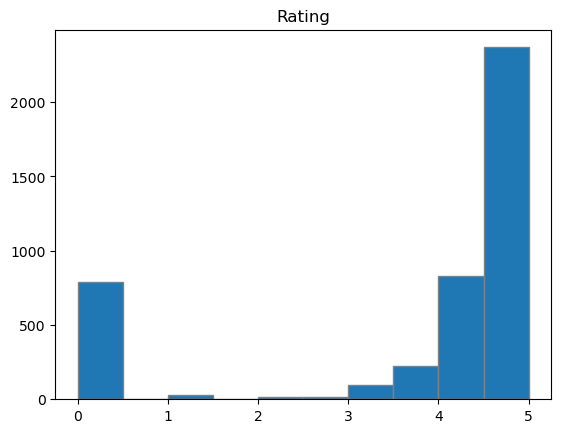

In [36]:
# Rating histogram
plt.hist(products['rating'], edgecolor='grey')
plt.title('Rating')
plt.show()

**Nhận xét:**
* Số lượng sản phẩm không có đánh giá chiếm khoảng 20% dữ liệu
* Phần lớn khách hàng cho điểm sản phẩm từ 4 điểm trở lên

## Reviews data

In [37]:
# Load data
reviews = pd.read_csv('Reviews.csv')
reviews.head()

,customer_id,product_id,name,rating,title
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng


In [38]:
reviews.shape

(293791, 5)

In [39]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293791 entries, 0 to 293790
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  293791 non-null  int64 
 1   product_id   293791 non-null  int64 
 2   name         293791 non-null  object
 3   rating       293791 non-null  int64 
 4   title        293791 non-null  object
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


In [40]:
# Rating
reviews['rating'].describe()

count           293,791.0
mean    4.454639522653859
std     1.039260049599285
min                   1.0
25%                   4.0
50%                   5.0
75%                   5.0
max                   5.0
Name: rating, dtype: float64

In [41]:
reviews['rating'].value_counts()

5    206397
4     49523
3     17363
1     14449
2      6059
Name: rating, dtype: int64

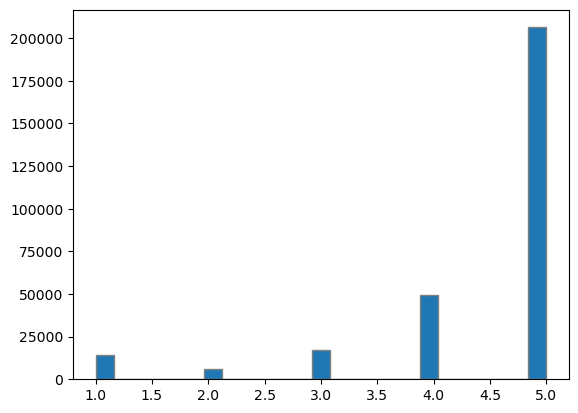

In [42]:
# Rating Visualization
plt.hist(reviews['rating'], bins=25, edgecolor='grey')
plt.show()

**Nhận xét:** 
* Điểm được đánh giá thấp nhất là 1 và cao nhất là 5
* Trung bình khách hàng đánh giá tất cả mặt hàng với 4.5 điểm
* Điểm 5 là điểm được đánh giá nhiều nhất

In [43]:
# sản phẩm được đánh giá nhiều nhất
rating_p = reviews['product_id'].value_counts().sort_values(ascending=False).head(10)
rating_p = rating_p.reset_index()
rating_p

,index,product_id
0,554912,995
1,51593115,993
2,487524,984
3,51884751,977
4,7749111,976
5,57440329,950
6,17019841,948
7,20478281,940
8,1714729,924
9,52717588,919


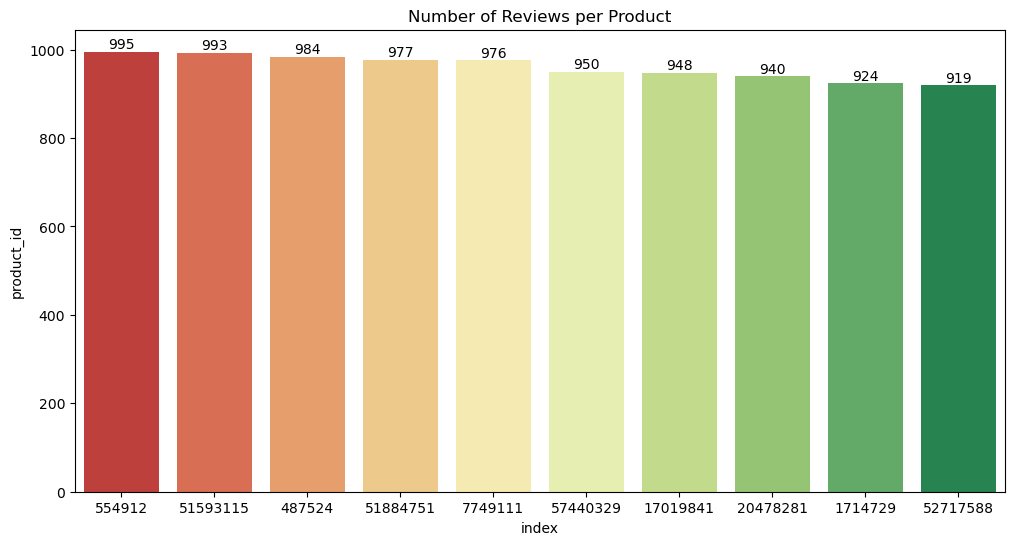

In [44]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='index', y='product_id', data=rating_p, palette='RdYlGn', order=rating_p['index'])
ax.bar_label(ax.containers[0], fmt='%.f')
plt.title('Number of Reviews per Product')
plt.show()

In [45]:
# khách hàng đánh giá nhiều nhất
rating_c = reviews['customer_id'].value_counts().sort_values(ascending=False).head(10)
rating_c = rating_c.reset_index()
rating_c

,index,customer_id
0,7737978,44
1,7280719,33
2,6106142,32
3,7377207,30
4,1046981,30
5,1064154,29
6,11575918,26
7,7556842,26
8,6844844,26
9,6177374,26


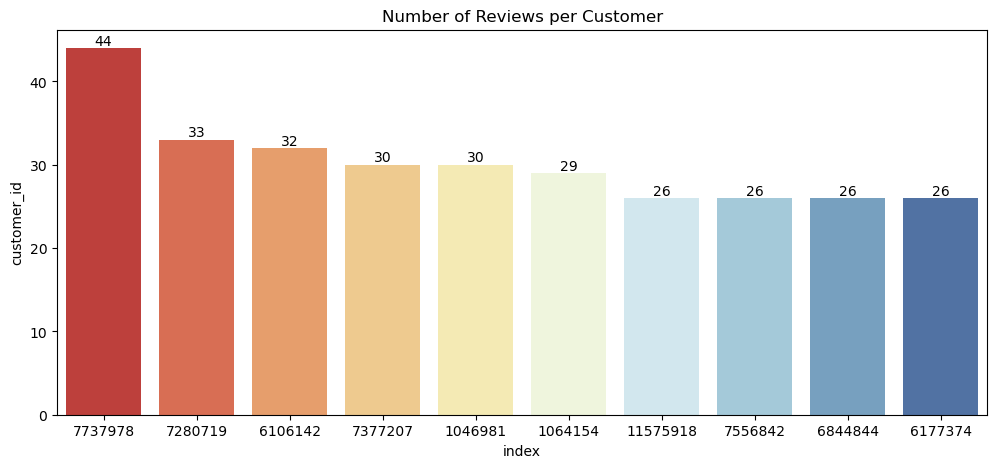

In [46]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='index', y='customer_id', data=rating_c, palette='RdYlBu', order=rating_c['index'])
ax.bar_label(ax.containers[0], fmt='%.f')
plt.title('Number of Reviews per Customer')
plt.show()

**Nhận xét:**
* Có sự chênh lệch trong số lượng đánh giá của các mặt hàng, id 299461 có số lượng đánh giá cao hơn rõ rệt so với các id còn lại.
* Số lượng đánh giá của không có sự chênh lệch đáng kể trong top 10 khách hành có nhiều lượt đánh giá nhất.

In [47]:
reviews.head()

,customer_id,product_id,name,rating,title
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng


In [48]:
reviews.groupby('product_id').agg(rating_avg=("rating", 'mean'),
                                  num_rating=("rating", 'count'),
                                  highest_rate=("rating", 'max'),
                                  lowest_rate=("rating", 'min')).sort_values(by='num_rating', ascending=False)

,rating_avg,num_rating,highest_rate,lowest_rate
product_id,,,,
554912,4.42713567839196,995,5,1
51593115,4.35448136958711,993,5,1
487524,4.6432926829268295,984,5,1
51884751,4.59467758444217,977,5,1
7749111,4.5625,976,5,1
...,...,...,...,...
4794549,5.0,1,5,5
54399906,5.0,1,5,5
72457285,5.0,1,5,5
